# **Step 1: Data Exploration and Preprocessing**

1. Load the Dataset and applying preprocessing

First, load the dataset into your environment using Python libraries like pandas.



In [ ]:
import pandas as pd
import io

# Importing and collect the information specified in our dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/ML Datasets.csv")
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check for desired predicted values counts
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
# Check if there is any null value in any column
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Droping customerID because It's not useful for prediction
df.drop('customerID', axis=1, inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Converting 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Checking for missing values in 'TotalCharges' and filling with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [ ]:
# Label encoding for binary categorical variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# One-hot encoding for multi-class categorical variables
multi_class_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scaling numerical features
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Display the first few rows after preprocessing
df.head(14)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,...,False,False,False,False,False,False,False,False,True,False
5,0,0,0,0,-0.992402,1,1,1.159546,-0.645186,1,...,False,False,True,False,True,False,False,False,True,False
6,0,0,0,1,-0.422317,1,1,0.808907,-0.146799,0,...,False,False,True,False,False,False,False,True,False,False
7,0,0,0,0,-0.910961,0,0,-1.163647,-0.874137,0,...,False,False,False,False,False,False,False,False,False,True
8,0,0,1,0,-0.177995,1,1,1.330711,0.337349,1,...,True,False,True,False,True,False,False,False,True,False
9,0,0,0,1,1.206498,1,0,-0.286218,0.532439,0,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [ ]:
# Check the unique values in each column
for col in df.columns:
    print(f'{col}: {df[col].nunique()} unique values')

gender: 1 unique values
SeniorCitizen: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
tenure: 73 unique values
PhoneService: 2 unique values
PaperlessBilling: 2 unique values
MonthlyCharges: 1585 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values
MultipleLines_No phone service: 2 unique values
MultipleLines_Yes: 2 unique values
InternetService_Fiber optic: 2 unique values
InternetService_No: 2 unique values
OnlineSecurity_No internet service: 2 unique values
OnlineSecurity_Yes: 2 unique values
OnlineBackup_No internet service: 2 unique values
OnlineBackup_Yes: 2 unique values
DeviceProtection_No internet service: 2 unique values
DeviceProtection_Yes: 2 unique values
TechSupport_No internet service: 2 unique values
TechSupport_Yes: 2 unique values
StreamingTV_No internet service: 2 unique values
StreamingTV_Yes: 2 unique values
StreamingMovies_No internet service: 2 unique values
StreamingMovies_Yes: 2 unique values
Contract_One year: 2 unique va

# **Step 2: Exploratory Data Analysis (EDA)**

**1. Churn Rate Distribution**

Analyzing the distribution of the target variable Churn.

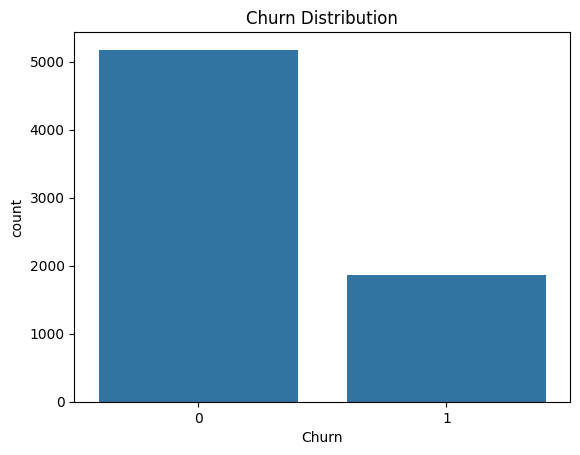

Churn Rate: 
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Churn rate percentage
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"Churn Rate: \n{churn_rate}")

**2. Distribution of Numerical Features**

Visualization of the distribution of numerical features like tenure, MonthlyCharges, and TotalCharges.

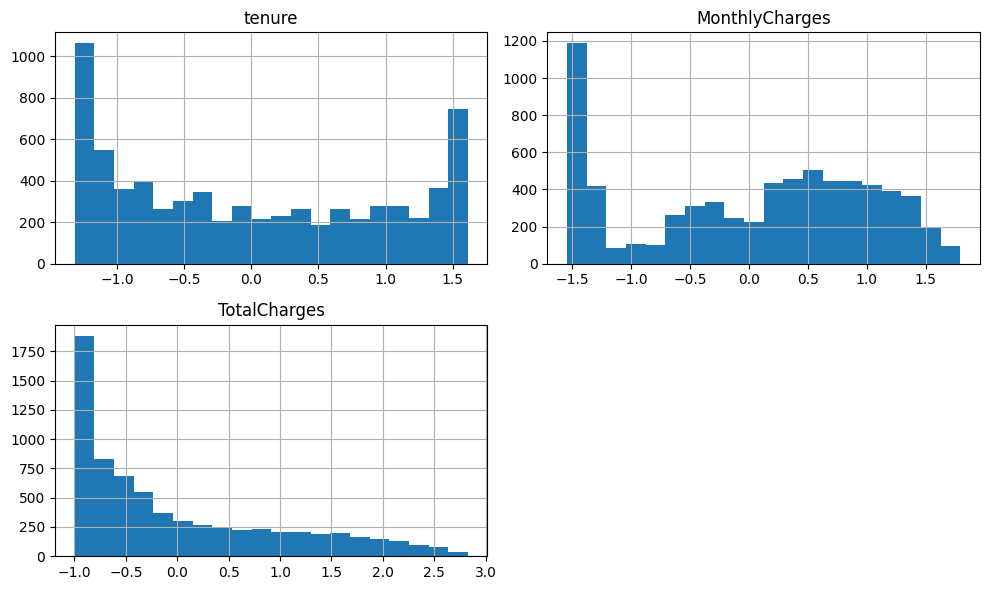

In [ ]:
# Histograms for numerical features
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

**3. Correlation Matrix**

Checking the correlation between numerical features and the target variable. We can use a heatmap to visualize it.

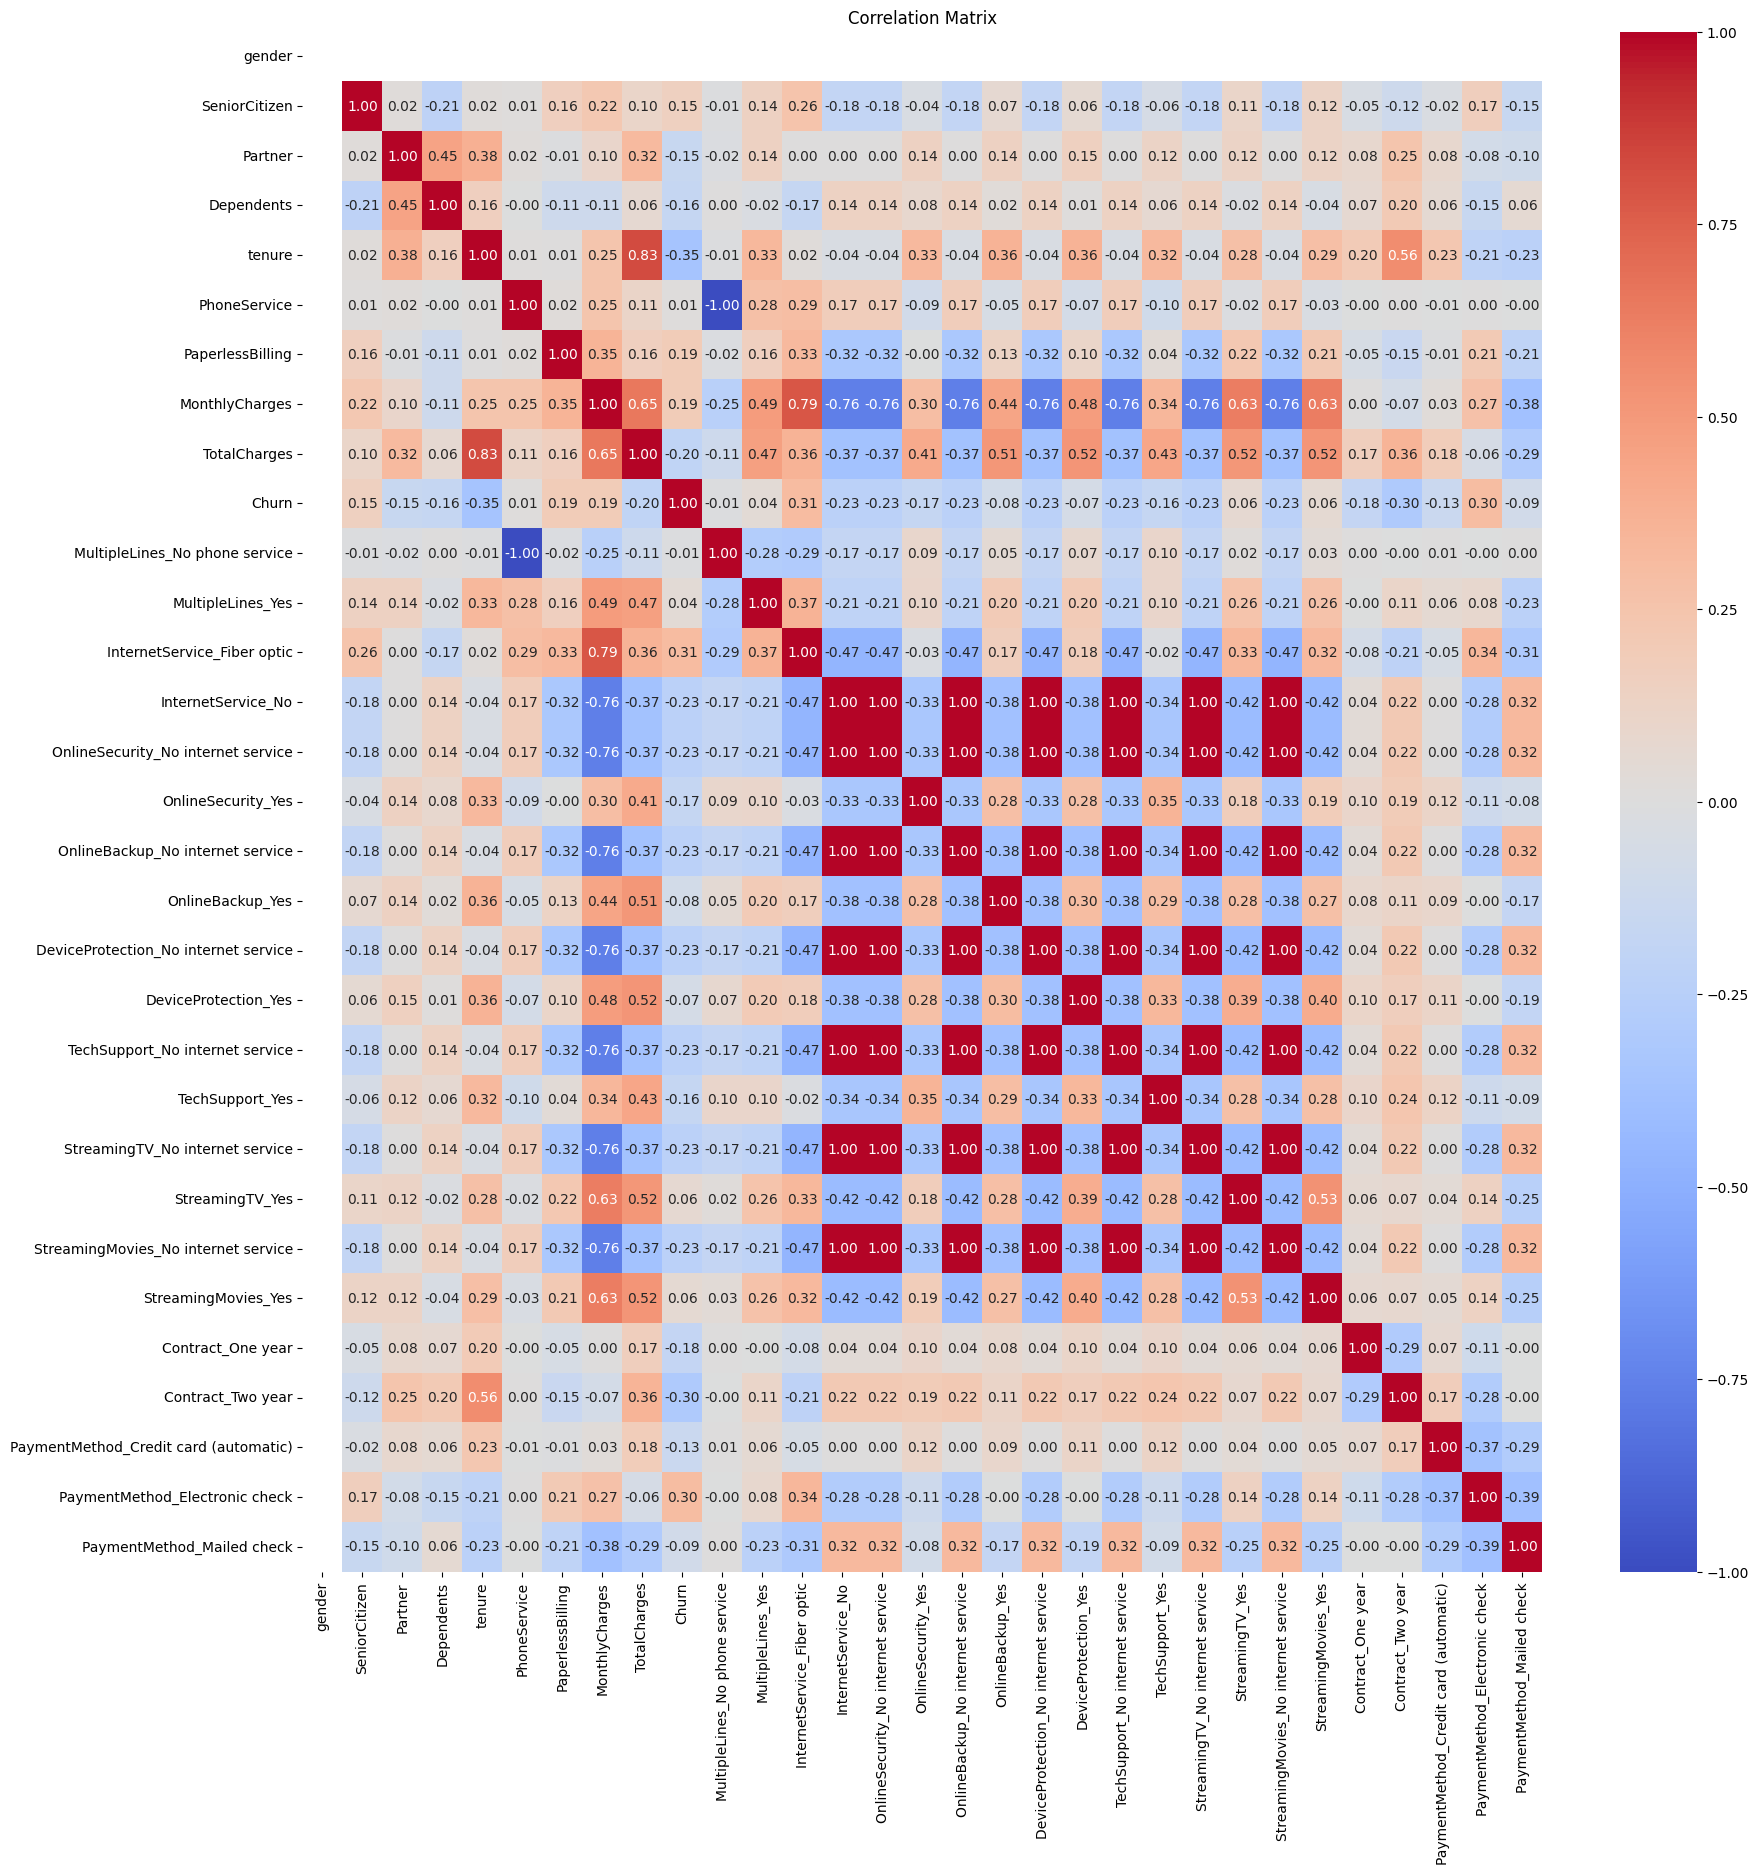

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap for correlation
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**4. Boxplots for Categorical Features Against Churn**

Understand how categorical variables impact churn by plotting boxplots.

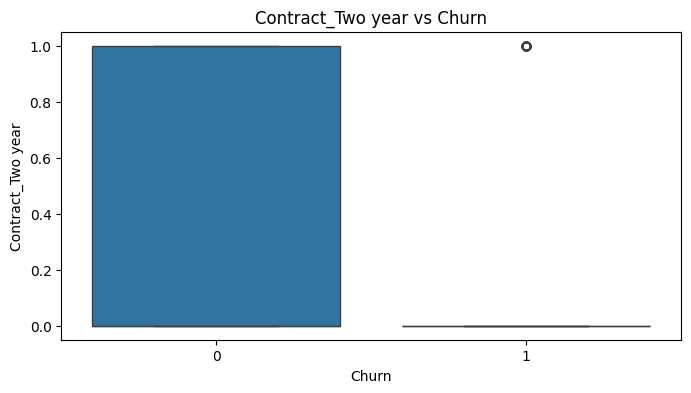

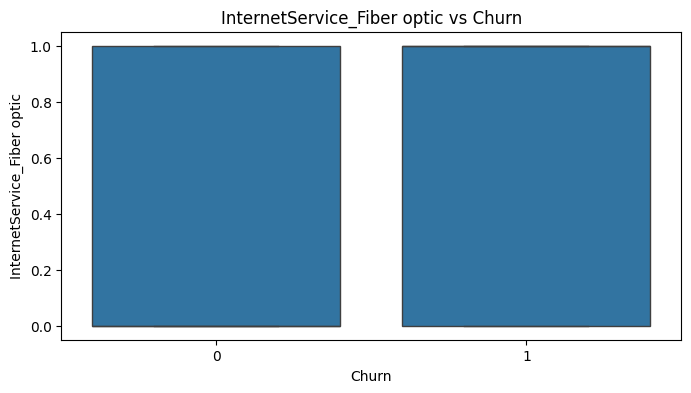

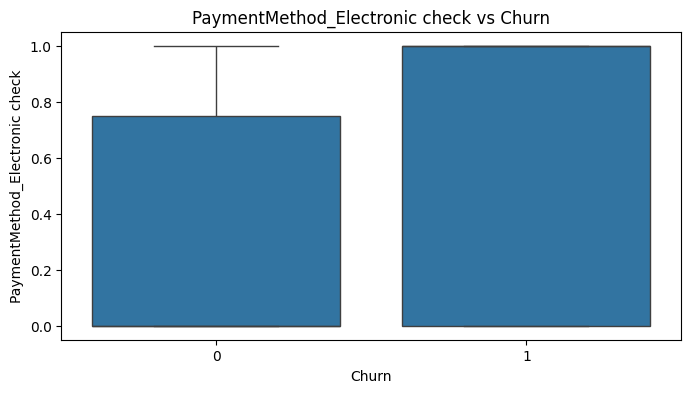

In [ ]:
# Boxplots for categorical features vs Churn
for col in ['Contract_Two year', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

**5. Pairplot**

Using a pairplot to explore relationships between numerical features and churn.

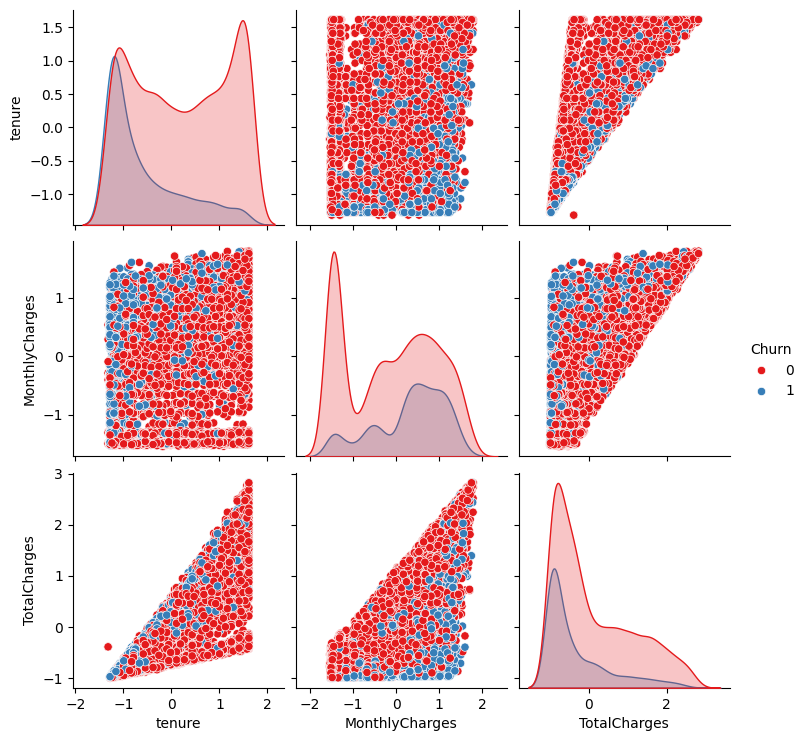

In [ ]:
# Pairplot for important features
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', palette='Set1')
plt.show()

**6. Crosstab for Categorical Features**

Exploring the relationship between churn and categorical features using crosstabs.

In [ ]:
# Crosstab for categorical features
contract_churn = pd.crosstab(df['Contract_Two year'], df['Churn'], normalize='index')
internet_churn = pd.crosstab(df['InternetService_Fiber optic'], df['Churn'], normalize='index')

print("Contract vs Churn:")
print(contract_churn)

print("Internet Service vs Churn:")
print(internet_churn)

Contract vs Churn:
Churn                     0         1
Contract_Two year                    
False              0.659499  0.340501
True               0.971681  0.028319
Internet Service vs Churn:
Churn                               0         1
InternetService_Fiber optic                    
False                        0.855080  0.144920
True                         0.581072  0.418928


**7. Service Usage Impact on Churn**

Visualizing how services like OnlineSecurity, TechSupport, and StreamingTV affect churn.

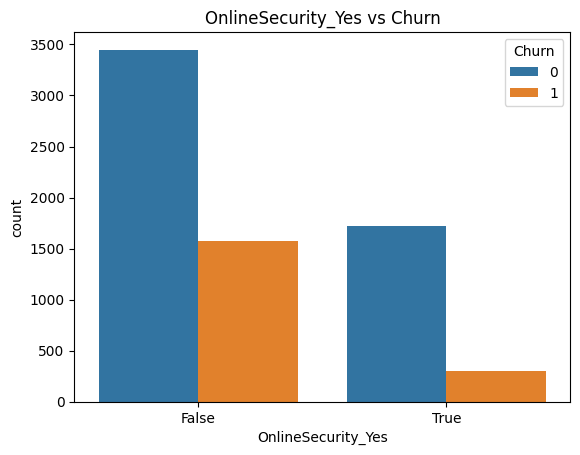

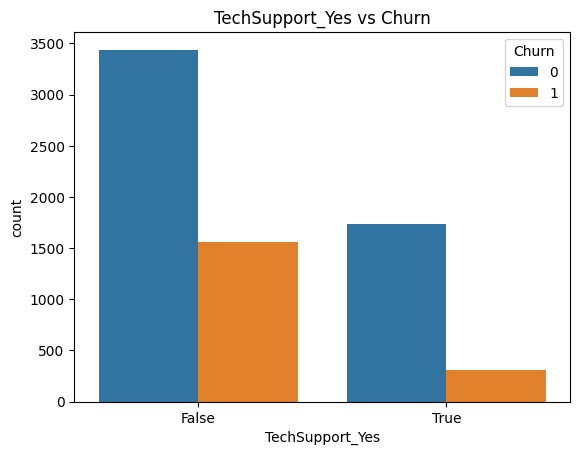

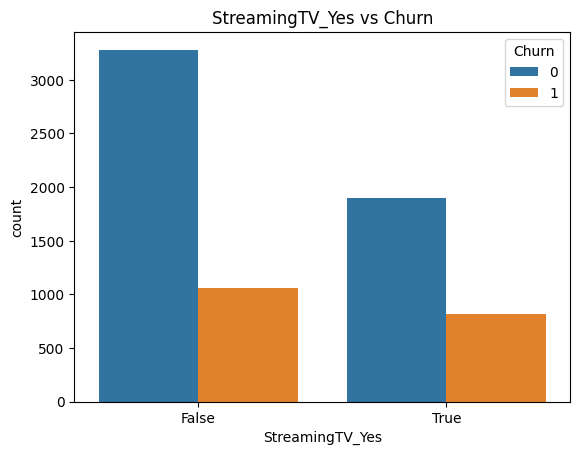

In [ ]:
# Plot service usage impact on churn
services = ['OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes']
for service in services:
    sns.countplot(x=service, hue='Churn', data=df)
    plt.title(f'{service} vs Churn')
    plt.show()

# **Step 3: Model Development**
1. Splitting the Data

To split the preprocessed dataset into training and testing sets, you can use train_test_split from the sklearn.model_selection module. This step is crucial to ensure that the model is trained on one part of the data and evaluated on a separate unseen part, avoiding overfitting.

2. Building and Evaluating Multiple Models


In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = df.drop('Churn', axis=1)  # All features except the target
y = df['Churn']  # Target variable

# Splitting the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the resulting datasets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (5634, 30)
Test set size: (1409, 30)


In [ ]:
# Building and Evaluating Multiple Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Dictionary to hold the models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "LightGBM": LGBMClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set

    # Print model performance
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


--- Logistic Regression ---
Accuracy: 0.8041
Confusion Matrix:
[[925 110]
 [166 208]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.80      0.80      1409



--- K-Nearest Neighbors ---
Accuracy: 0.7708
Confusion Matrix:
[[883 152]
 [171 203]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1035
           1       0.57      0.54      0.56       374

    accuracy                           0.77      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409



--- Support Vector Machine ---
Accuracy: 0.7991
Confusion Matrix:
[[944  91]
 [192 182]]
Classification Report:
            

# **Step 4: Model Training with Cross-Validation**

We'll use cross-validation to ensure that the models generalize well to unseen data. This technique splits the data into multiple folds, trains the model on several subsets of the data, and averages the performance metrics to avoid overfitting.

In [ ]:
from sklearn.model_selection import cross_val_score

# Define a function to apply cross-validation to each model
def train_with_cross_validation(models, X_train, y_train, cv=5):
    for name, model in models.items():
        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        print(f"--- {name} ---")
        print(f"Cross-Validation Accuracy Scores: {cv_scores}")
        print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
        print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")
        print("\n")

# Train models with cross-validation (5-fold)
train_with_cross_validation(models, X_train, y_train)

--- Logistic Regression ---
Cross-Validation Accuracy Scores: [0.83052351 0.80035492 0.80479148 0.79148181 0.79307282]
Mean CV Accuracy: 0.8040
Standard Deviation of CV Accuracy: 0.0141


--- K-Nearest Neighbors ---
Cross-Validation Accuracy Scores: [0.78349601 0.77284827 0.76574978 0.78793256 0.74333925]
Mean CV Accuracy: 0.7707
Standard Deviation of CV Accuracy: 0.0157


--- Support Vector Machine ---
Cross-Validation Accuracy Scores: [0.81810115 0.81011535 0.7985803  0.7905945  0.79573712]
Mean CV Accuracy: 0.8026
Standard Deviation of CV Accuracy: 0.0100


--- Random Forest ---
Cross-Validation Accuracy Scores: [0.7985803  0.79946761 0.78704525 0.77462289 0.77175844]
Mean CV Accuracy: 0.7863
Standard Deviation of CV Accuracy: 0.0116


--- Gradient Boosting ---
Cross-Validation Accuracy Scores: [0.81898846 0.80390417 0.81543922 0.78793256 0.78774423]
Mean CV Accuracy: 0.8028
Standard Deviation of CV Accuracy: 0.0132


--- XGBoost ---
Cross-Validation Accuracy Scores: [0.79769299 0.7

# **Step 5: Model Evaluation**

After training the models, we'll evaluate them using the following metrics:

- Accuracy: Proportion of correctly predicted instances.
- Precision: Proportion of true positive predictions among all positive predictions.
- Recall: Proportion of true positive predictions among all actual positives.
- F1-Score: Harmonic mean of precision and recall, balancing both.
- ROC-AUC: Area under the ROC curve, useful for imbalanced data.
- Confusion Matrix: A detailed breakdown of true positives, true negatives, false positives, and false negatives.

--- Logistic Regression ---
Accuracy: 0.8041
Precision: 0.6541
Recall: 0.5561
F1-Score: 0.6012
ROC-AUC: 0.8423
Confusion Matrix:
[[925 110]
 [166 208]]
--- K-Nearest Neighbors ---
Accuracy: 0.7708
Precision: 0.5718
Recall: 0.5428
F1-Score: 0.5569
ROC-AUC: 0.7821
Confusion Matrix:
[[883 152]
 [171 203]]
--- Support Vector Machine ---
Accuracy: 0.7991
Precision: 0.6667
Recall: 0.4866
F1-Score: 0.5626
ROC-AUC: nan
Confusion Matrix:
[[944  91]
 [192 182]]
--- Random Forest ---
Accuracy: 0.7857
Precision: 0.6184
Recall: 0.5027
F1-Score: 0.5546
ROC-AUC: 0.8223
Confusion Matrix:
[[919 116]
 [186 188]]
--- Gradient Boosting ---
Accuracy: 0.7970
Precision: 0.6497
Recall: 0.5107
F1-Score: 0.5719
ROC-AUC: 0.8425
Confusion Matrix:
[[932 103]
 [183 191]]
--- XGBoost ---
Accuracy: 0.7786
Precision: 0.5957
Recall: 0.5160
F1-Score: 0.5530
ROC-AUC: 0.8202
Confusion Matrix:
[[904 131]
 [181 193]]
--- Naive Bayes ---
Accuracy: 0.6558
Precision: 0.4269
Recall: 0.8663
F1-Score: 0.5719
ROC-AUC: 0.8092
Confu

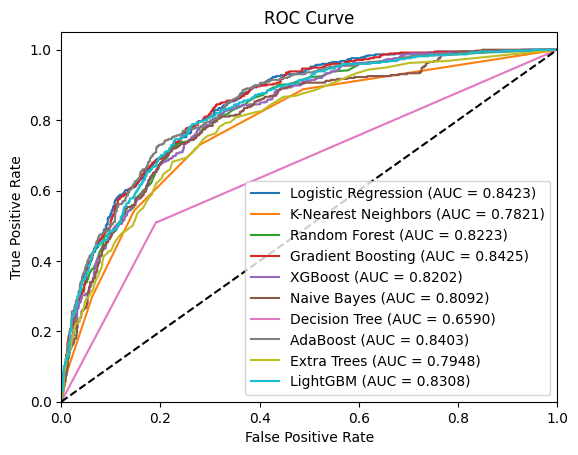

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Function to evaluate the models
def evaluate_model_performance(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
        cm = confusion_matrix(y_test, y_pred)

        # Display metrics
        print(f"--- {name} ---")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"ROC-AUC: {roc_auc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

        # Plot ROC curve if probabilities are available
        if y_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

    # Plot the ROC curve for all models
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Evaluate models
evaluate_model_performance(models, X_train, y_train, X_test, y_test)


# **Step 6: Hyperparameter Tuning using Grid Search and Random Search**
Hyperparameter tuning helps improve model performance by finding the best set of parameters for each model. You can use Grid Search for an exhaustive search over parameter values or Random Search for a randomized search. In this step, we will demonstrate how to tune hyperparameters using both techniques.

1. Grid Search for Hyperparameter Tuning
Grid search tests all possible combinations of specified hyperparameters to find the best one. This method is more time-consuming but guarantees finding the best set of parameters within the provided grid.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for a few models (you can add more)
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    }
}

# Function for Grid Search CV
def perform_grid_search(models, param_grids, X_train, y_train):
    best_estimators = {}
    for name, model in models.items():
        if name in param_grids:  # Check if the model has a defined param grid
            print(f"Performing Grid Search for {name}...")
            grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name],
                                       scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
            grid_search.fit(X_train, y_train)
            best_estimators[name] = grid_search.best_estimator_
            print(f"Best parameters for {name}: {grid_search.best_params_}")
            print(f"Best cross-validated score for {name}: {grid_search.best_score_:.4f}\n")
    return best_estimators

# Run grid search for hyperparameter tuning
best_estimators = perform_grid_search(models, param_grids, X_train, y_train)


Performing Grid Search for Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validated score for Random Forest: 0.7993

Performing Grid Search for XGBoost...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best cross-validated score for XGBoost: 0.8021



2. Random Search for Hyperparameter Tuning
Random Search explores a random subset of the hyperparameter space, which is more efficient than Grid Search for large hyperparameter grids.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distributions for Random Search (you can expand this)
param_distributions = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'bootstrap': [True, False]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1.0]
    }
}

# Function for Random Search CV
def perform_random_search(models, param_distributions, X_train, y_train, n_iter=10):
    best_estimators = {}
    for name, model in models.items():
        if name in param_distributions:  # Check if the model has a defined param distribution
            print(f"Performing Random Search for {name}...")
            random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions[name],
                                               scoring='accuracy', cv=5, n_iter=n_iter, n_jobs=-1, verbose=1, random_state=42)
            random_search.fit(X_train, y_train)
            best_estimators[name] = random_search.best_estimator_
            print(f"Best parameters for {name}: {random_search.best_params_}")
            print(f"Best cross-validated score for {name}: {random_search.best_score_:.4f}\n")
    return best_estimators

# Run random search for hyperparameter tuning
best_estimators_random = perform_random_search(models, param_distributions, X_train, y_train, n_iter=10)


Performing Random Search for Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 10, 'bootstrap': True}
Best cross-validated score for Random Forest: 0.7991

Performing Random Search for XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Best cross-validated score for XGBoost: 0.8040



# **Step 7: Saving Models**



In [ ]:
import joblib

for key, value in models.items():
  joblib.dump(value, f'Models/{key}.pkl')
  print(f"Saved {key} at /Models/{key}.pkl")


Saved Logistic Regression at /Models/Logistic Regression.pkl
Saved K-Nearest Neighbors at /Models/K-Nearest Neighbors.pkl
Saved Support Vector Machine at /Models/Support Vector Machine.pkl
Saved Random Forest at /Models/Random Forest.pkl
Saved Gradient Boosting at /Models/Gradient Boosting.pkl
Saved XGBoost at /Models/XGBoost.pkl
Saved Naive Bayes at /Models/Naive Bayes.pkl
Saved Decision Tree at /Models/Decision Tree.pkl
Saved AdaBoost at /Models/AdaBoost.pkl
Saved Extra Trees at /Models/Extra Trees.pkl
Saved LightGBM at /Models/LightGBM.pkl


# **Step 8: Model Interpretation and Insights**
1. Feature Importance
Feature importance tells us how each feature contributes to the predictions. Models like Random Forest, XGBoost, and LightGBM natively provide feature importance scores. Here’s how to extract and plot feature importance:

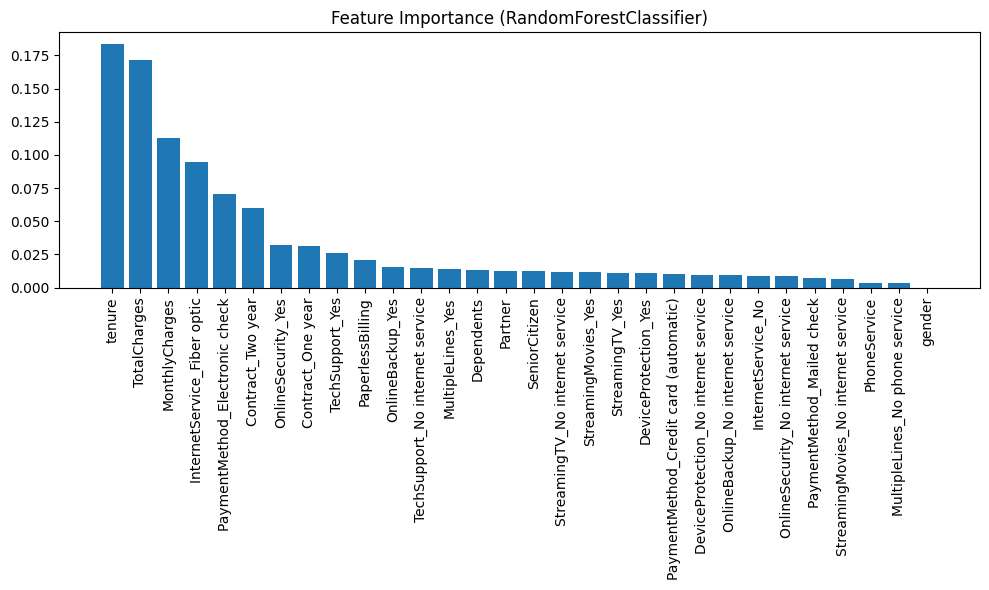

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot feature importance for models that provide it
def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        # Plot the feature importances
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature Importance ({type(model).__name__})")
        plt.bar(range(len(indices)), importances[indices], align="center")
        plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()

# Example: Plot feature importance for Random Forest (if Random Forest is one of the best estimators)
rf_model = best_estimators.get('Random Forest')  # Replace with the best-performing model
if rf_model:
    plot_feature_importance(rf_model, X_train.columns)


2. SHAP Values (SHapley Additive exPlanations)
SHAP values provide a game-theoretic approach to explain individual predictions. They offer a consistent method to interpret any machine learning model by showing the impact of each feature on the prediction. SHAP values are especially useful for interpreting complex models like XGBoost, LightGBM, or Random Forest.

To use SHAP for model interpretation, we have to install the shap package:

In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:
non_numeric_columns = df.columns[10::]
non_numeric_columns

Index(['MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Define a column transformer to apply one-hot encoding to categorical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), non_numeric_columns)
    ], remainder='passthrough'  # Keep all other columns unchanged
)

# Apply the transformation to both training and test data
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

# Convert the transformed data to a DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded)
X_test_encoded = pd.DataFrame(X_test_encoded)

# Convert all data to float64 to avoid dtype issues
X_train_encoded = X_train_encoded.astype(float)
X_test_encoded = X_test_encoded.astype(float)


In [ ]:
# Check for object (non-numeric) columns in X_train
# Check data types after encoding
print(X_train_encoded.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
dtype: object


In [ ]:
X_train_summary = shap.kmeans(X_train_encoded, 10)

In [ ]:
# Now rerun the SHAP explainer
lg_explainer = shap.KernelExplainer(models['Logistic Regression'].predict_proba, X_train_summary)
shap_values = lg_explainer.shap_values(X_test_encoded)


  0%|          | 0/1409 [00:00<?, ?it/s]

In [ ]:
shap.initjs()

In [ ]:
shap.force_plot(lg_explainer.expected_value[0], shap_values)